In [2]:
from IPython import display as Display
import os
import ultralytics
import glob
from roboflow import Roboflow
from IPython.display import Image, display
Display.clear_output()

In [3]:

rf = Roboflow(api_key="nz2w1UFnyFrM7e73WOzh")
project = rf.workspace("nyu-figsb").project("basketballdetection-cki6r")
dataset = project.version(10)


loading Roboflow workspace...
loading Roboflow project...


In [3]:
print(HOME)


/content


In [4]:
# train

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=150 patience=20 plots=True 

New https://pypi.org/project/ultralytics/8.0.143 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.140 🚀 Python-3.9.17 torch-2.0.1 CPU (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data={dataset.location}/data.yaml, epochs=150, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fa

/content


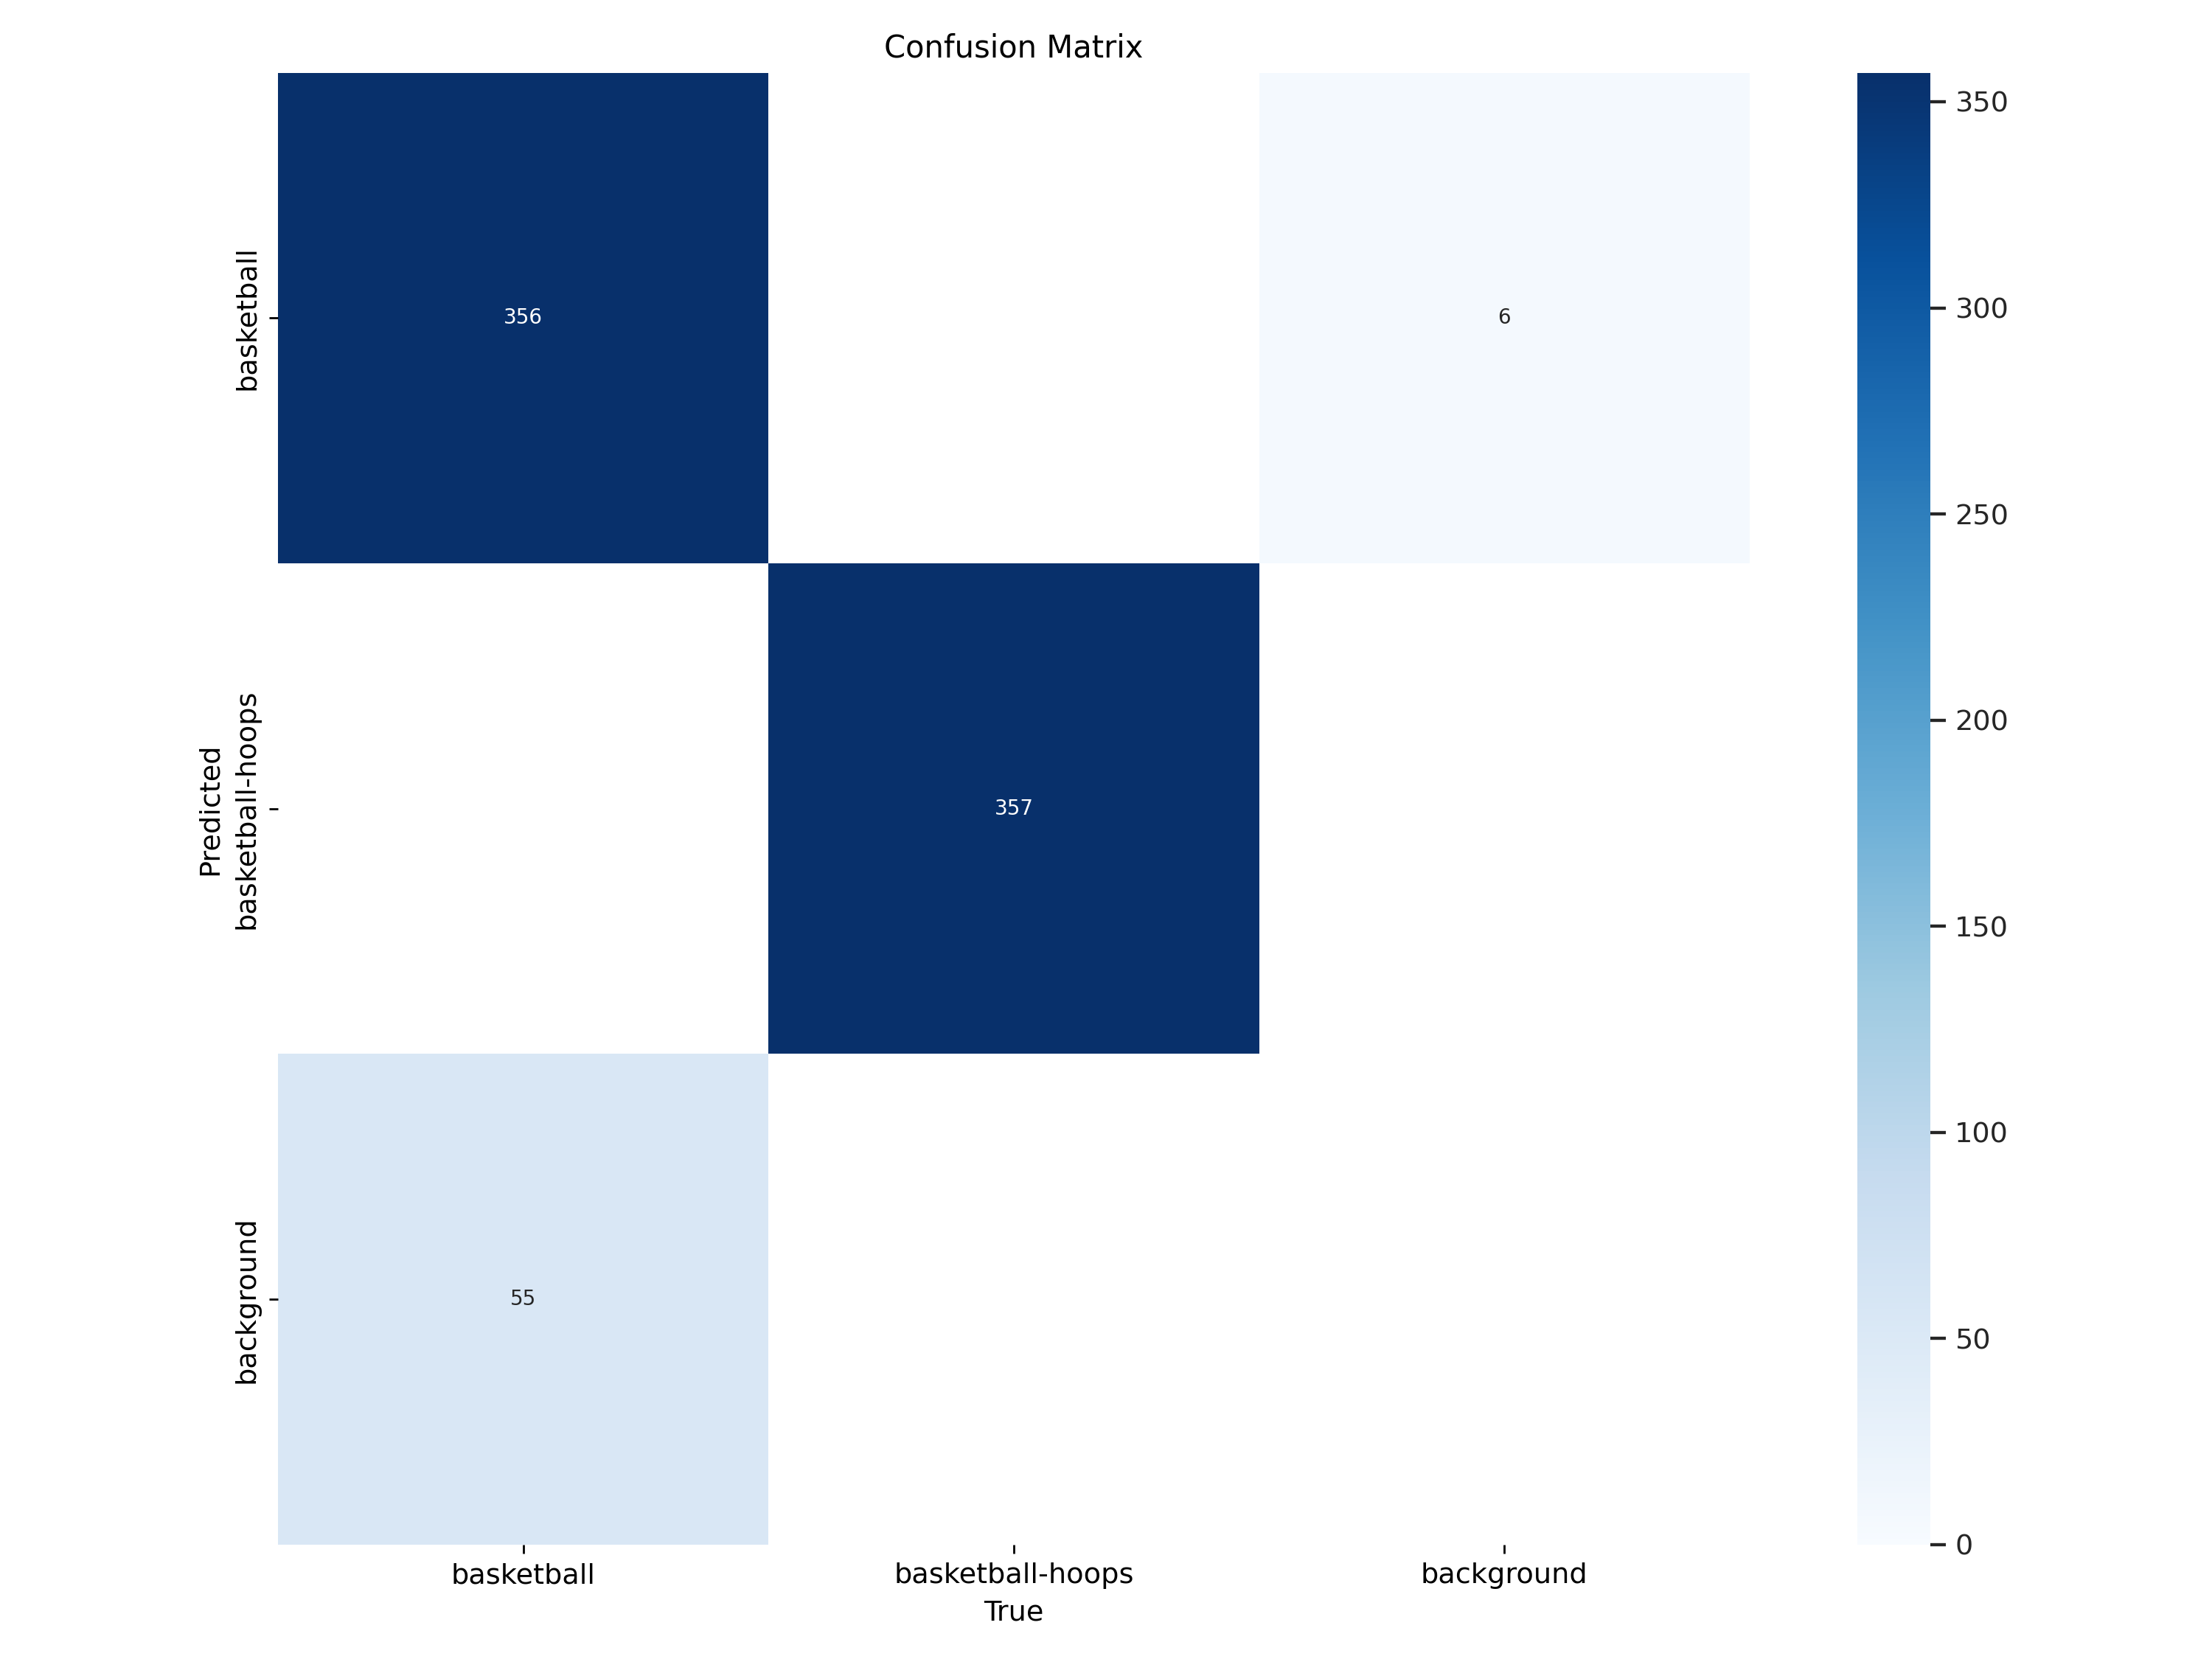

In [ ]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train6/confusion_matrix.png', width=600)

/content


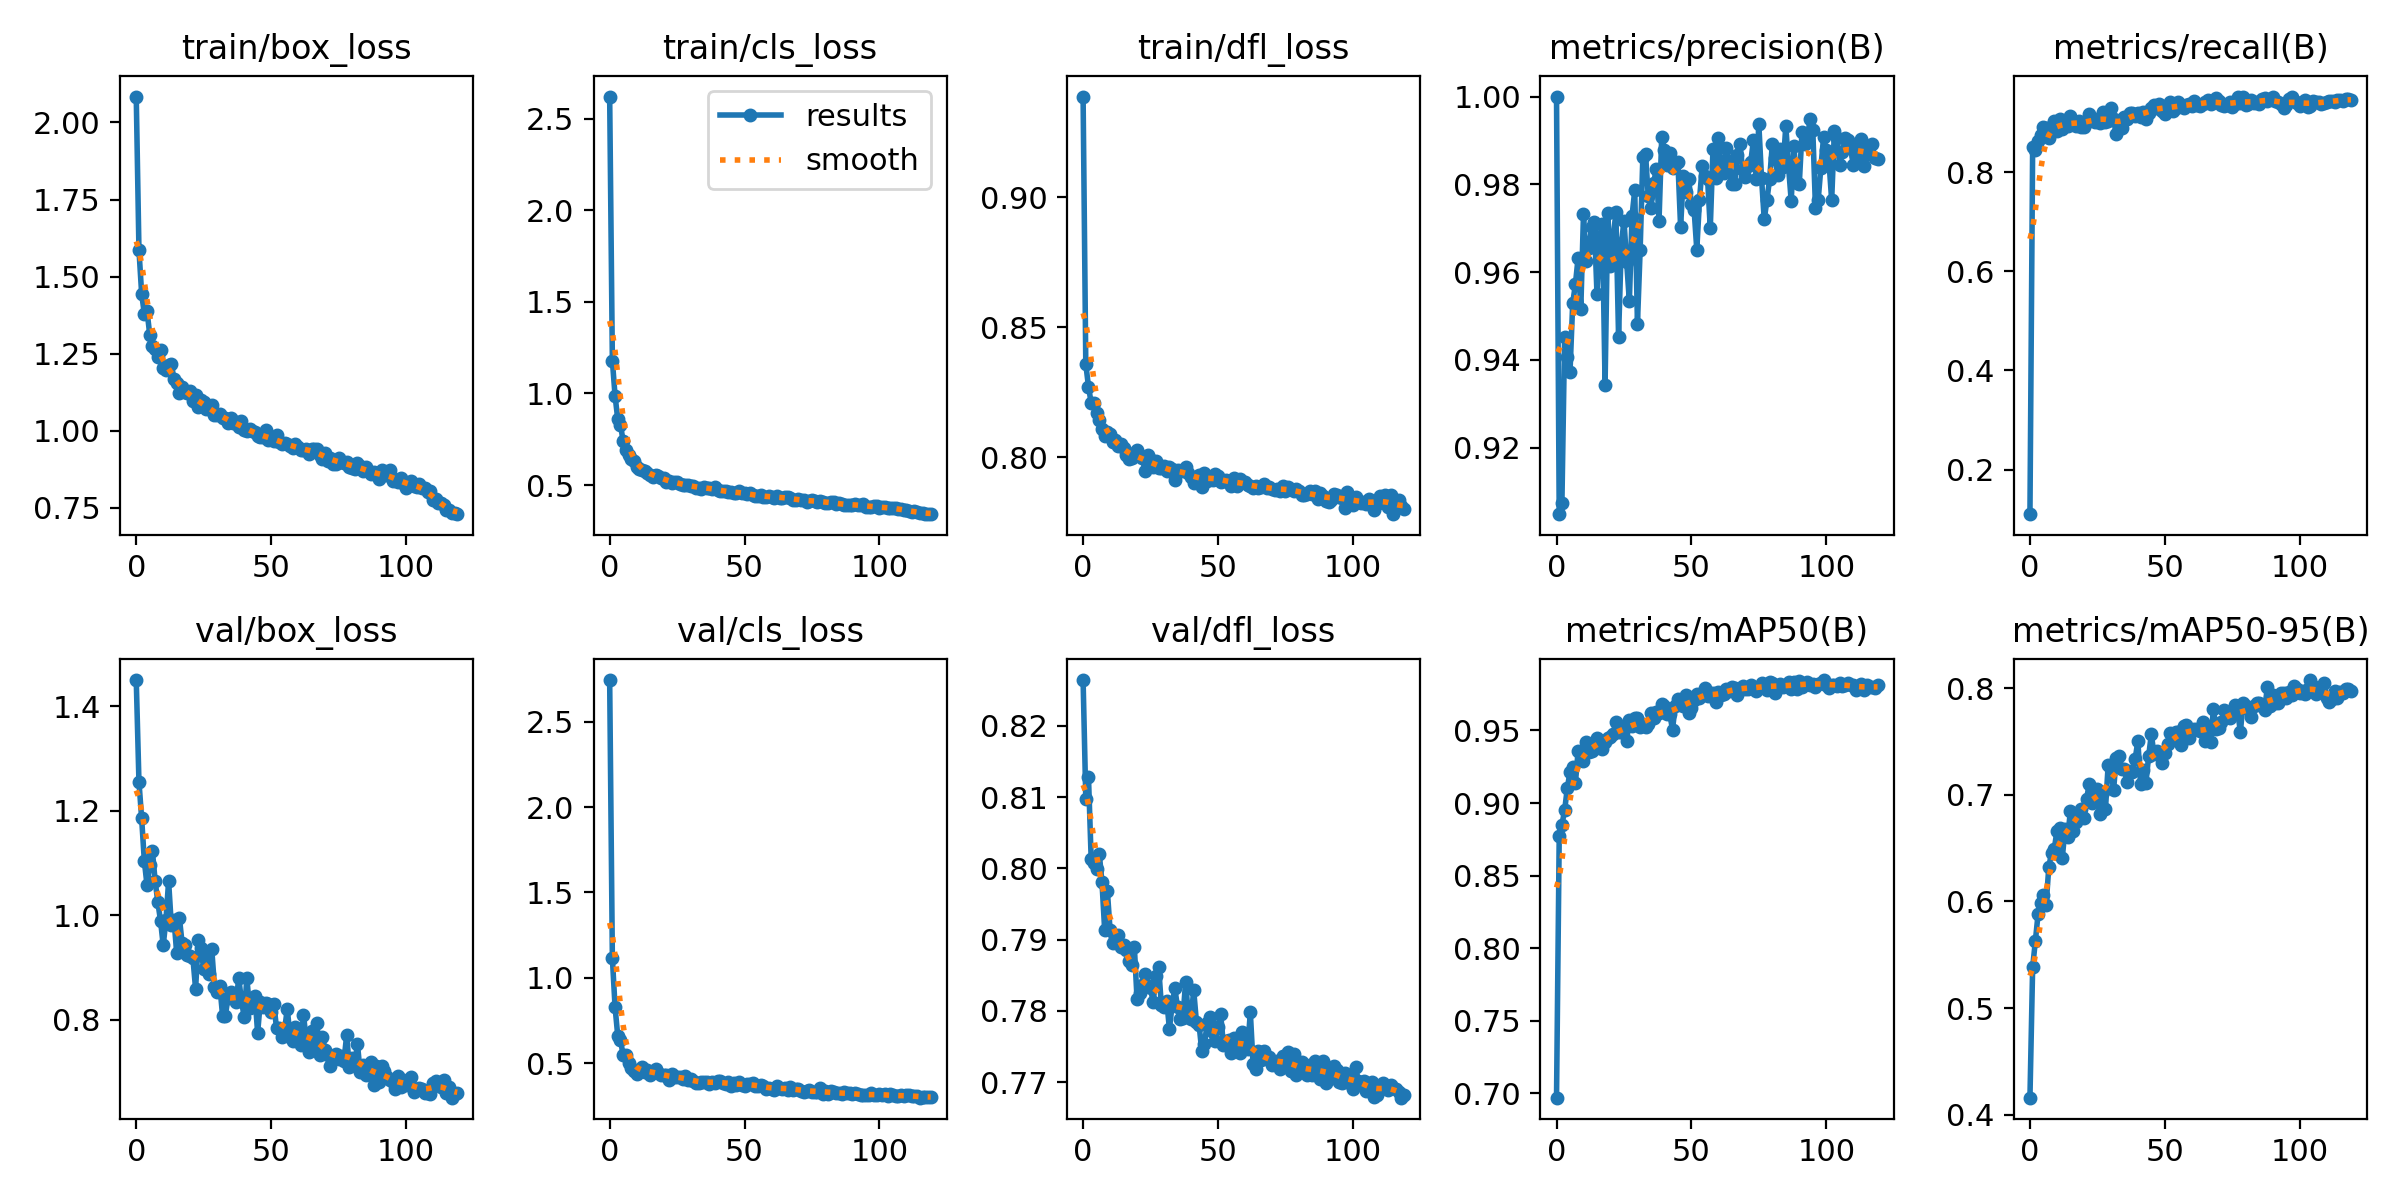

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/results.png', width=600)

In [ ]:
# Validation
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train6/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients
val: Scanning /content/datasets/datasets/basketballDetection-10/valid/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100% 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:10<00:00,  1.35s/it]
                   all        119        768      0.991      0.933      0.981      0.822
            basketball        119        411      0.983      0.865      0.967      0.765
      basketball-hoops        119        357      0.998          1      0.995      0.879
Speed: 3.4ms preprocess, 9.4ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/detect/val


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train6/weights/best.pt conf=0.30 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients

image 1/57 /content/datasets/datasets/basketballDetection-10/test/images/2023_06_21_-_Game_2-xJLCPqvNo00_mp4-18_jpg.rf.1f5239e5d3713526cd47d874ceb7cf5d.jpg: 384x640 1 basketball, 3 basketball-hoopss, 119.5ms
image 2/57 /content/datasets/datasets/basketballDetection-10/test/images/2023_06_21_-_Game_2-xJLCPqvNo00_mp4-19_jpg.rf.98418b0a801780441d1e6403487b3e66.jpg: 384x640 1 basketball, 3 basketball-hoopss, 9.2ms
image 3/57 /content/datasets/datasets/basketballDetection-10/test/images/2023_06_21_-_Game_2-xJLCPqvNo00_mp4-8_jpg.rf.71edda81b3b781edfc568d53a7fbe7fb.jpg: 384x640 2 basketballs, 3 basketball-hoopss, 9.6ms
image 4/57 /content/datasets/datasets/basketballDetection-10/test/images/2023_06_21_-_Game_9-3JNAviE7Zvw_frame_18_jpg.rf.701bbd1416564476748502a7e08cb87e.jpg: 384x640 3 basketball-hoopss, 8.4ms
image 5/57 /content/da

In [ ]:
i = 0
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg'):
      if i == 15:
          break
      display(Image(filename=image_path, width=800))
      print("\n")
      i += 1

In [ ]:
import time
while True:
  time.sleep(20)

In [ ]:
!cd {HOME}
project.version(dataset.version).deploy(model_type="yolov8", model_path='/content/runs/detect/train/')

Dependency ultralytics<=8.0.20 is required but found version=8.0.124, to fix: `pip install ultralytics<=8.0.20`
View the status of your deployment at: https://app.roboflow.com/nyu-figsb/basketballdetection-cki6r/deploy/6
Share your model with the world at: https://universe.roboflow.com/nyu-figsb/basketballdetection-cki6r/model/6


In [ ]:
from google.colab import files
try:
  files.download("/content/runs/detect/train6/weights/best.pt")
except:
  try:
    files.download("/content/runs/detect/train/weights/best.pt")
  except:
    files.download("/content/runs/detect/train3/weights/best.pt")